In [4]:
import matplotlib.pyplot as plt
plt.style.use("huntstone")
import numpy as np
from multiprocessing import Pool
from functools import partial
import sys
sys.path.insert(0, "../../python/")
import eo_signal as eos
from plotting import makefig
import time

In [5]:
def get_sep(ind, d, angle):
    I, ti, Idz, sig, t_sig, gamma, t_gamma \
                   = eos.get_signal(ind, "GaP", d, 800e-9, 30e-15, angle, 1e-3, "cross")
    Sdz = eos.peak2peak(sig, t_sig)
    error = abs(Sdz - Idz) / Idz
    return error

def plot_result(errors, omits):
    fig1, ax1 = makefig(xlab = r'd [$\mu$m]', ylab = "Angle [deg.]")
    ext       = [25, 200, 10, 60]
    img1      = ax1.imshow(np.transpose(errors*100), cmap = 'jet', extent = ext, aspect = 'auto')
    cbar      = plt.colorbar(mappable = img, label = 'Avg. Error [%]')
    
    fig2, ax2 = makefig(xlab = r'd [$\mu$m]', ylab = "Angle [deg.]")
    img2      = ax.imshow(np.transpose(omits), cmap = 'jet', extent = ext, aspect = 'auto')
    cbar      = plt.colorbar(mappable = img2, label = 'Failure Rate [%]') 

In [8]:
ds     = np.array([25, 50, 100, 150, 200])*1e-6
ths    = np.arange(10, 61, 5)
N      = 100
inds   = np.arange(0, N, 1)
errors = np.zeros((len(ds), len(ths)))
omits  = np.zeros((len(ds), len(ths)))
start = time.time()
pool = Pool(4)
for i in range(len(ds)):
    print(i+1, "of", len(ds))
    for j in range(len(ths)):
        errf = partial(get_sep, d = ds[i], angle = ths[j])
        errs = pool.map(errf, inds)
        errors[i,j] = np.nanmean(errs)
        omits[i,j]  = np.sum(np.isnan(errs))
pool.close()
pool.join()
print(time.time() - start)

1 of 5
2 of 5
3 of 5
4 of 5
5 of 5
224.4487340450287


In [ ]:
import numpy as np
from multiprocessing import Pool
def fun(x, y, z):
    # time-consuming computation...
    # ...

    return output
def fun_wrapper(indices):
    fun(*indices)

if __name__ == '__main__':
    dim1 = 10
    dim2 = 20
    dim3 = 30

    result = np.zeros([dim1, dim2, dim3])

    pool = Pool(processes=8)
    for i in xrange(dim1):
        for j in xrange(dim2):
            result[i, j] = pool.map(fun_wrapper, [(i, j, k) for k in xrange(dim3)])

In [ ]:
131.98652362823486

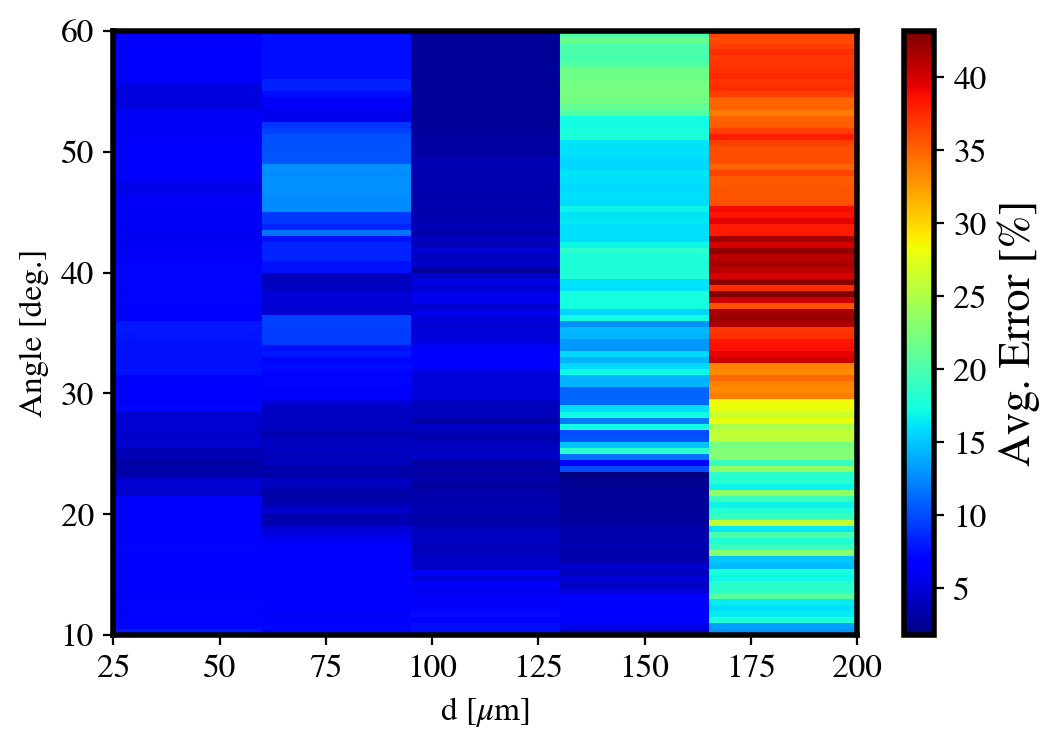

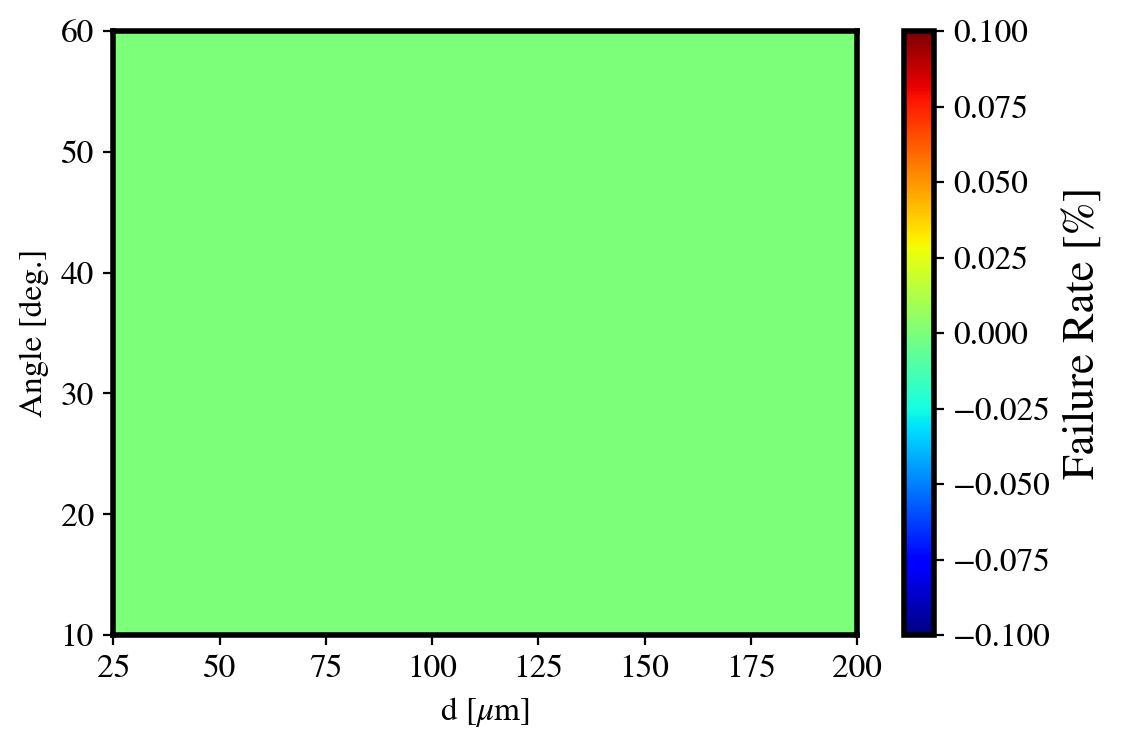

In [11]:
plot_result(errors, omits*100/N)